In this demo, we train a 1-hiddel layer fully-connected network on MNIST for 10 epochs using the Burstprop learning rule with updating feedback weights, and observe the weight alignment before and after training.

## Import dependencies

In [42]:
import os
import math

import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt

## Setting the hyperparameters

In [43]:
directory = "./Demo"

n_epochs = 10             # Train for 10 epochs
batch_size = 32           # Set the batch size
n_hidden_layers = 1       # Use one hidden layer
weight_decay = 1e-4       # Set weight decay
momentum = 0.9            # Set momentum
hidden_lr = 1.0           # Set the learning rate for the hidden layer
output_lr = 0.01          # Set the learning rate for the output layer
weight_fa_learning = True # Use the Kolen-Pollack learning rule for feedback weights
weight_fa_std = 0.1       # Set standard deviation for initialization of feedback weights

## Running the training script

We'll use Jupyter's magic %run command to run the main script:

In [44]:
%run train_mnist.py {directory} -momentum {momentum} -n_epochs {n_epochs} -weight_decay {weight_decay} -n_hidden_layers {n_hidden_layers} -hidden_lr {hidden_lr} -output_lr {output_lr} -weight_fa_std {weight_fa_std} -batch_size {batch_size} -weight_fa_learning {weight_fa_learning} -validation True

Test Loss: 0.503 | Acc: 10.390% (1039/10000): 100%|██████████| 100/100 [00:02<00:00, 38.06it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 1.


Train Loss: 0.083 | Acc: 35.934% (17967/50000): 100%|██████████| 1563/1563 [00:57<00:00, 27.37it/s]
Test Loss: 0.054 | Acc: 65.170% (6517/10000): 100%|██████████| 100/100 [00:01<00:00, 55.94it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 2.


Train Loss: 0.043 | Acc: 71.852% (35926/50000): 100%|██████████| 1563/1563 [00:46<00:00, 33.26it/s]
Test Loss: 0.036 | Acc: 77.680% (7768/10000): 100%|██████████| 100/100 [00:01<00:00, 57.85it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 3.


Train Loss: 0.032 | Acc: 80.868% (40434/50000): 100%|██████████| 1563/1563 [00:45<00:00, 34.38it/s]
Test Loss: 0.029 | Acc: 84.560% (8456/10000): 100%|██████████| 100/100 [00:01<00:00, 56.05it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 4.


Train Loss: 0.026 | Acc: 87.784% (43892/50000): 100%|██████████| 1563/1563 [00:46<00:00, 33.30it/s]
Test Loss: 0.025 | Acc: 87.930% (8793/10000): 100%|██████████| 100/100 [00:01<00:00, 52.69it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 5.


Train Loss: 0.024 | Acc: 89.078% (44539/50000): 100%|██████████| 1563/1563 [00:47<00:00, 33.18it/s]
Test Loss: 0.023 | Acc: 88.600% (8860/10000): 100%|██████████| 100/100 [00:01<00:00, 56.74it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 6.


Train Loss: 0.023 | Acc: 89.560% (44780/50000): 100%|██████████| 1563/1563 [00:44<00:00, 34.97it/s]
Test Loss: 0.023 | Acc: 88.920% (8892/10000): 100%|██████████| 100/100 [00:01<00:00, 53.64it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 7.


Train Loss: 0.022 | Acc: 89.876% (44938/50000): 100%|██████████| 1563/1563 [00:46<00:00, 33.64it/s]
Test Loss: 0.022 | Acc: 89.210% (8921/10000): 100%|██████████| 100/100 [00:01<00:00, 56.77it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 8.


Train Loss: 0.022 | Acc: 90.096% (45048/50000): 100%|██████████| 1563/1563 [00:46<00:00, 33.48it/s]
Test Loss: 0.022 | Acc: 89.280% (8928/10000): 100%|██████████| 100/100 [00:01<00:00, 54.55it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 9.


Train Loss: 0.022 | Acc: 90.186% (45093/50000): 100%|██████████| 1563/1563 [00:46<00:00, 33.48it/s]
Test Loss: 0.022 | Acc: 89.450% (8945/10000): 100%|██████████| 100/100 [00:01<00:00, 56.33it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 10.


Train Loss: 0.022 | Acc: 90.294% (45147/50000): 100%|██████████| 1563/1563 [00:46<00:00, 33.80it/s]
Test Loss: 0.022 | Acc: 89.550% (8955/10000): 100%|██████████| 100/100 [00:02<00:00, 48.49it/s]


**Note:** The same can be done from the command line, by running:

```
python3 train_mnist.py ./Demo -momentum 0.9 -n_epochs 10 -weight_decay 1e-4 -n_hidden_layers 1 -hidden_lr 1.0 -output_lr 0.01 -weight_fa_std 0.1 -batch_size 32 -weight_fa_learning True -validation True
```

## Loading the model

In [45]:
net_pre = torch.load(os.path.join(directory, "initial_model.pth")) # Before training
net = torch.load(os.path.join(directory, "model.pth"))             # After 10 epochs

## Compare weight alignment before and after training

In [46]:
weight_fa_pre = net_pre.classification_layers[1].weight_fa
weight_pre = net_pre.classification_layers[1].weight

weight_fa = net.classification_layers[1].weight_fa
weight = net.classification_layers[1].weight

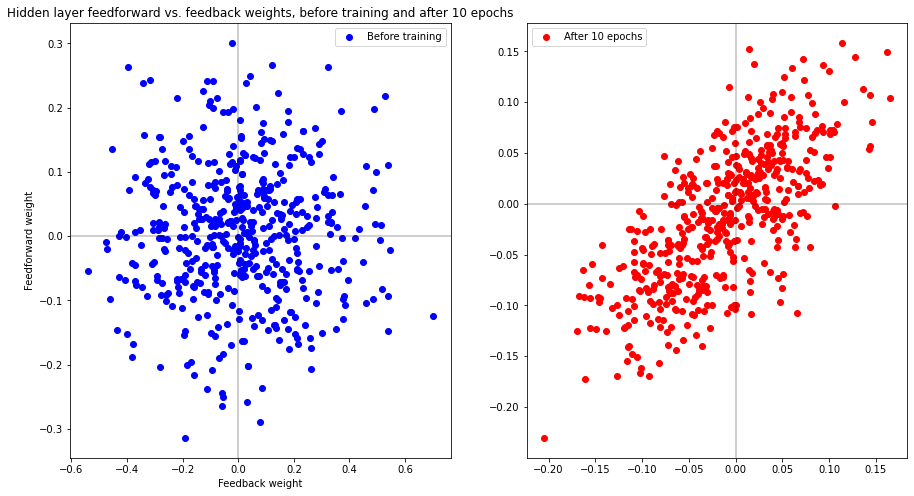

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.axhline(y=0, color='k', alpha=0.25)
ax1.axvline(x=0, color='k', alpha=0.25)
ax2.axhline(y=0, color='k', alpha=0.25)
ax2.axvline(x=0, color='k', alpha=0.25)
ax1.scatter(weight_pre.flatten()[:500], weight_fa_pre.flatten()[:500], c='b', label='Before training')
ax2.scatter(weight.flatten()[:500], weight_fa.flatten()[:500], c='r', label=f'After {n_epochs} epochs')
ax1.set_xlabel('Feedback weight')
ax1.set_ylabel('Feedforward weight')
ax1.set_title(f"Hidden layer feedforward vs. feedback weights, before training and after {n_epochs} epochs")
ax1.legend()
ax2.legend()
plt.show()

In [48]:
def weight_alignment(weight, weight_fa):
    """
    Given feedforward and feedback weights, compute the
    angle between the weight vectors.
    
    Arguments:
    weight: Feedforward weight tensor.
    weight_fa: Feedback weight tensor.
    
    Returns:
    Angle between the two weigh
    """
    
    return (180/math.pi)*torch.acos(F.cosine_similarity(weight.flatten(), weight_fa.flatten(), dim=0))

In [49]:
# Compare angles between weights pre- and post-training

print(f"Before training: {weight_alignment(weight_pre, weight_fa_pre)}")
print(f"After {n_epochs} epochs: {weight_alignment(weight, weight_fa)}")

Before training: 89.88915252685547
After 10 epochs: 42.22511672973633
